To implement Fisher Scoring we need to find the score vector and the information matrix of the normal distribution's log-likelihood function. We can easily solve this optimization problem using python and some basic calculus.

Start by loading numpy and pyplot:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

With Fisher Scoring we can estimate the parameter $\theta^T = \left(\mu,\sigma\right)$ by finding the score vector and the information matrix of the normal distribution's log-likelihood function. This is essentially an iterative second order method to find the maximizer $\theta^*$ (similar to Newton's method).

$$U(\theta)=
\begin{pmatrix}
\dfrac{\partial \log \mathcal{L}}{\partial \mu}\\
\dfrac{\partial \log \mathcal{L}}{\partial \sigma^2} 
\end{pmatrix}
=\begin{pmatrix}
\dfrac{\sum_{i=1}^n x_i - n\mu}{\sigma^2} \\ 
\dfrac{-n}{2\sigma^2}+\dfrac{\sum_{i=1}^n(x_i-\mu)^2}{2(\sigma^2)^2} 
\end{pmatrix}$$

The information matrix, $I(\theta)$, is given by taking the negative expectation of the Hessian $H(\theta)$:

$$-E\left(H(\theta)\right)=
\begin{pmatrix}
\dfrac{n}{\sigma^2} & 0 \\ 
0 & \dfrac{n}{2(\sigma^2)^2} 
\end{pmatrix}$$

The MLE estimate can be found iteratively as follows: $$\hat{\theta}_{t+1}=\hat{\theta}_t+I^{-1}(\theta_t)U(\theta_t)$$

Generate normally distributed sampled centered at 100 with variance 15:

In [2]:
n = 10000
mu, sigma = 100, 15
x = np.random.normal(mu,sigma,n)

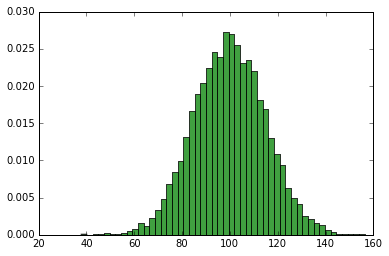

In [3]:
# the histogram of the data
m, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=.75)

The code below consists of two functions that implement the iterative procedure. The first function simply calculates the score function. The second function is a while loop that calls the first function on each update and stops when $\| \hat{\theta}_{t+1}-\hat{\theta}_t\|$ is less than a chosen tolerance level.

In [4]:
def fisher_scoring(x, theta):
    theta = np.array(theta)
    mu,sigma = theta
    score = np.array([(np.sum(x)-n*mu)/sigma,(-n/(2*sigma))+(np.sum((x-mu)**2)/(2*(sigma**2)))])
    fisher_info = np.array([n/sigma,0,0,n/(2*(sigma**2))]).reshape(2,2)
    theta_hat = theta + np.dot(np.linalg.inv(fisher_info),score) # theta_0 + inverse of fisher_info * score
    return theta_hat

In [5]:
def fisher_solver(x, theta, max_iter = 1e3, tol = 1e-16):
    count = 0
    theta_hat = fisher_scoring(x, theta)
    while np.linalg.norm(theta-theta_hat)>tol:
        theta=theta_hat
        theta_hat = fisher_scoring(x, theta)
        count += 1
        if count >= max_iter:
            break
    theta_hat = [theta_hat[0],np.sqrt(theta_hat[1])]
    if count == max_iter:
        print 'Fisher Scoring reached the maximum number of iterations allowed ({}) prior to convergence.'.format(count)
    else:
        print 'Fisher Scoring converged after {} iterations.'.format(count)
    print 'The estimate mean is {:.2f} and the estimate standard deviation {:.2f}.'.format(theta_hat[0],theta_hat[1])
    return theta_hat

In [6]:
#initial parameter value
theta_0 = [0,.25]

mu,sigma = fisher_solver(x,theta_0, max_iter = 0)

Fisher Scoring converged after 1 iterations.
The estimate mean is 99.78 and the estimate standard deviation 14.97.


A more economical way to implement Fisher scoring is by recursion. 

In [7]:
def fisher_recursion(x,theta,tol):
    theta = np.array(theta)
    mu,sigma = theta
    score = np.array([(np.sum(x)-n*mu)/sigma,(-n/(2*sigma))+(np.sum((x-mu)**2)/(2*(sigma**2)))])
    fisher_info = np.array([n/sigma,0,0,n/(2*(sigma**2))]).reshape(2,2)
    theta_hat = theta + np.dot(np.linalg.inv(fisher_info),score) # theta_0 + inverse of fisher_info * score
    
    if np.linalg.norm(theta-theta_hat)<tol:
        theta_hat = [theta_hat[0],np.sqrt(theta_hat[1])]
        print 'The estimate mean is {:.2f} and the estimate standard deviation {:.2f}.'.format(theta_hat[0],theta_hat[1])
        return theta_hat
    else:
        theta = theta_hat
        theta_hat = fisher_recursion(x,theta,tol)
        return theta_hat

In [8]:
theta_recursion = fisher_recursion(x,theta_0,1e-6)

The estimate mean is 99.78 and the estimate standard deviation 14.97.
